#### Comprehensive EDA Summary

Below is a consolidated overview of the exploratory data analysis (EDA) conducted on this hematopoietic cell transplantation (HCT) dataset. It incorporates insights from all 26 images and the previous descriptive summaries, providing a holistic picture of data quality, distribution of key variables, and potential areas of interest for modelin

--------------------------------------------------------------------------------
Key Observations & Insights
--------------------------------------------------------------------------------

1. High-Level Data Imbalance
   - Numerous variables (e.g., comorbidities, interventions) show a dominant “No” or “N/A” category, which may challenge model training for minority categories.

2. Potential Data Quality Concerns
   - The prevalence of “Not done” or “N/A” in many columns (e.g., obesity, peptic_ulcer, cyto_score_detail) blurs the line between truly negative/absent conditions and missing or inapplicable data.

3. Clinical Relevance
   - Conditioning intensity, donor relationship, HLA match levels, and comorbidity scores are all known to influence transplant outcomes. The EDA reaffirms their likely importance for survival models.

4. Race and Ethnicity
   - The dataset’s relatively even representation across race groups is crucial for fairness objectives. It provides a solid basis for evaluating and mitigating any racial disparities in predictive performance.
orous fairness evaluations—ultimately advancing equitable survival predictions for patients undergoing HCT.


--------------------------------------------------------------------------------
1. Data and Missingness Overview
--------------------------------------------------------------------------------

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

# Configure plotting and ignore error for clarity
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore")

C:\Users\Hi\AppData\Local\Temp\ipykernel_6056\785136884.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
data_dict = pd.read_csv('data_dictionary.csv')

# Print basic info about the files
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_submission.shape)
print("Data dictionary shape:", data_dict.shape)

Train shape: (28800, 60)
Test shape: (3, 58)
Sample submission shape: (3, 2)
Data dictionary shape: (59, 4)


In [4]:
# Display the first few rows of the training data
train.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [5]:
# Get a concise summary of the dataframe (data types and non-null counts)
train.info()

# Check for missing values per column (sorted in descending order)
missing_values = train.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

<Figure size 1200x600 with 0 Axes>

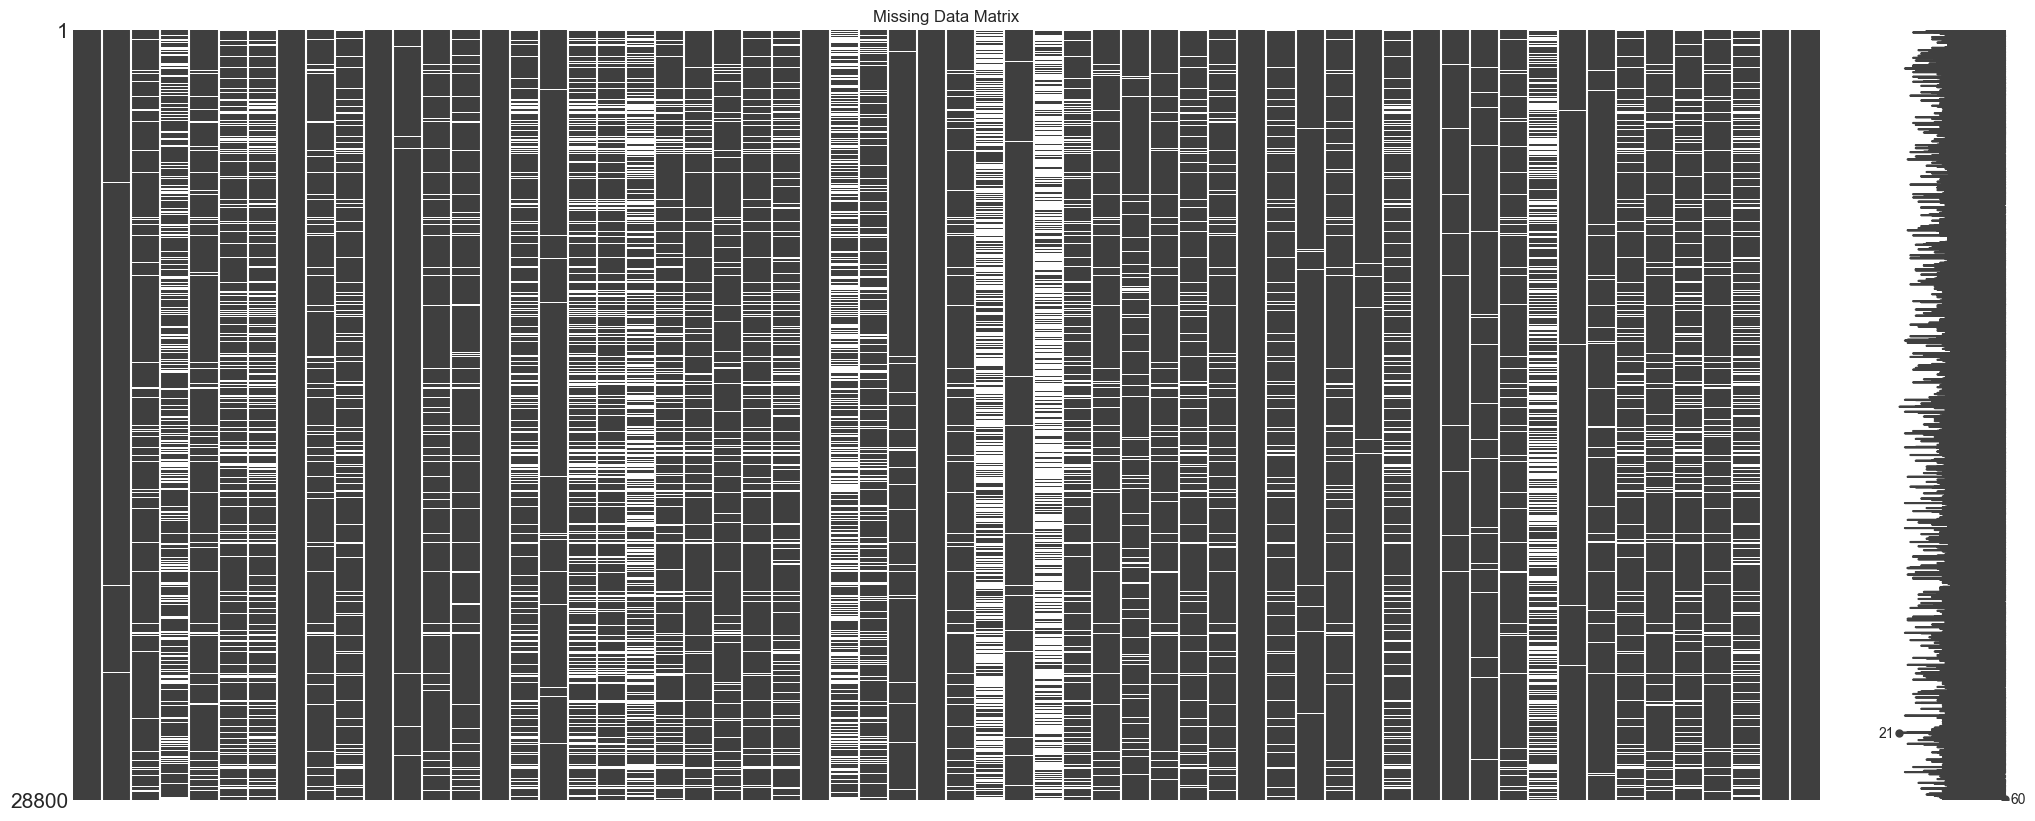

In [10]:
# Visualize the missing data pattern with missingno
plt.figure(figsize=(12, 6))
msno.matrix(train, fontsize=12)
plt.title("Missing Data Matrix")
plt.show()

<Figure size 1200x600 with 0 Axes>

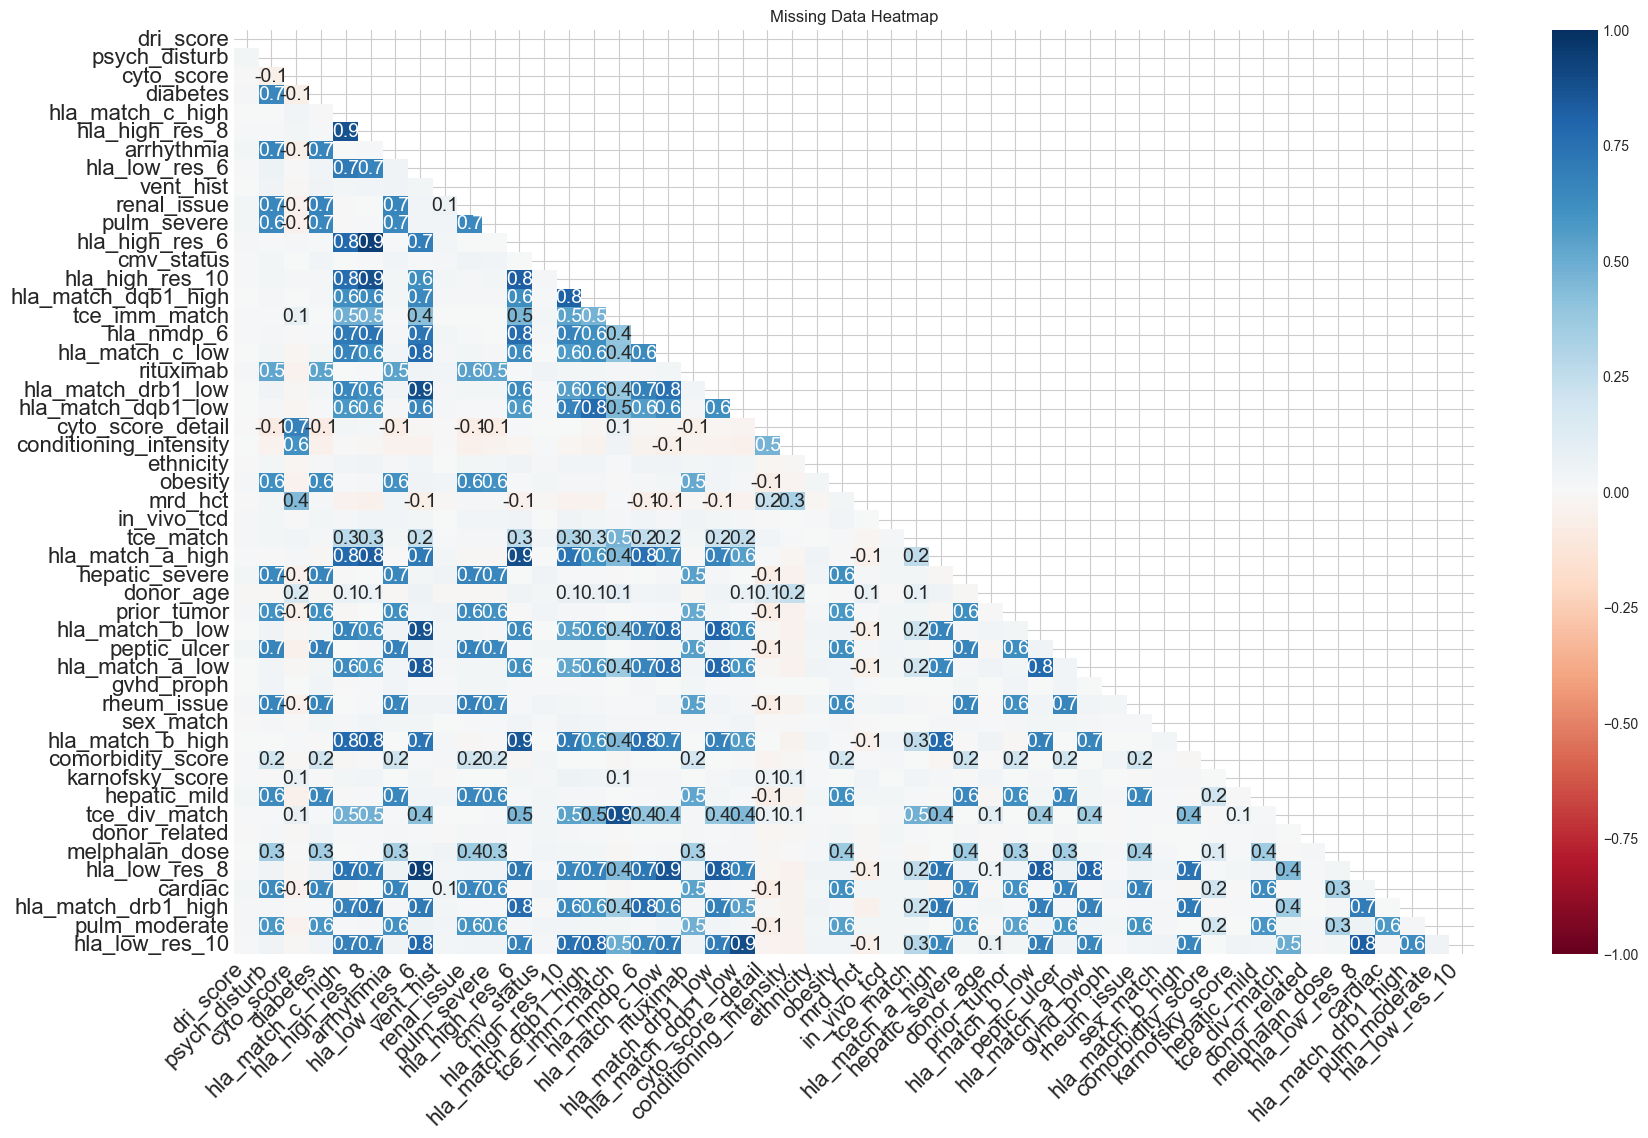

In [11]:
plt.figure(figsize=(12, 6))
msno.heatmap(train)
plt.title("Missing Data Heatmap")
plt.show()

1. Dataset Shape
   - Train Set: 28,800 rows × 60 columns
   - Test Set: 3 rows × 58 columns

2. Missing Data Matrix & Heatmap
   - High Missingness in Certain Columns: Features such as tce_match, mrd_hct, and cyto_score_detail have significant gaps.
   - Pattern of Sparse Features: The missingno heatmap shows that some columns share similar missingness patterns, suggesting these may be related or require joint imputation strategies.

3. Implications
   - Imputation or Feature Selection: Columns with over 30–40% missing data may require targeted imputation, domain-driven exclusion, or advanced techniques (e.g., multiple imputation).
   - Censoring: Time-to-event data (e.g., efs_time) includes censored observations; appropriate survival analysis methods should account for this.

--------------------------------------------------------------------------------
2. Target Variables
--------------------------------------------------------------------------------

In [7]:
# Display descriptive statistics for numerical features
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,28800.0,14399.500000,8313.988213,0.000,7199.75000,14399.5000,21599.25000,28799.000
hla_match_c_high,24180.0,1.764516,0.431941,0.000,2.00000,2.0000,2.00000,2.000
hla_high_res_8,22971.0,6.876801,1.564313,2.000,6.00000,8.0000,8.00000,8.000
hla_low_res_6,25530.0,5.143322,1.207757,2.000,4.00000,6.0000,6.00000,6.000
hla_high_res_6,23516.0,5.109202,1.214162,0.000,4.00000,6.0000,6.00000,6.000
hla_high_res_10,21637.0,8.617230,1.905125,3.000,7.00000,10.0000,10.00000,10.000
hla_match_dqb1_high,23601.0,1.736876,0.447687,0.000,1.00000,2.0000,2.00000,2.000
hla_nmdp_6,24603.0,5.160346,1.203240,2.000,4.00000,6.0000,6.00000,6.000
hla_match_c_low,26000.0,1.757808,0.435453,0.000,2.00000,2.0000,2.00000,2.000
hla_match_drb1_low,26157.0,1.715296,0.451282,1.000,1.00000,2.0000,2.00000,2.000


In [8]:
# Identify categorical columns (object dtype) and show their statistics
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# Use describe() on categorical features to see counts, unique values, etc.
train[cat_cols].describe().T

Categorical columns: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


,count,unique,top,freq
dri_score,28646,11,Intermediate,10436
psych_disturb,26738,3,No,23005
cyto_score,20732,7,Poor,8802
diabetes,26681,3,No,22201
tbi_status,28800,8,No TBI,18861
arrhythmia,26598,3,No,25203
graft_type,28800,2,Peripheral blood,20546
vent_hist,28541,2,No,27721
renal_issue,26885,3,No,26548
pulm_severe,26665,3,No,24779


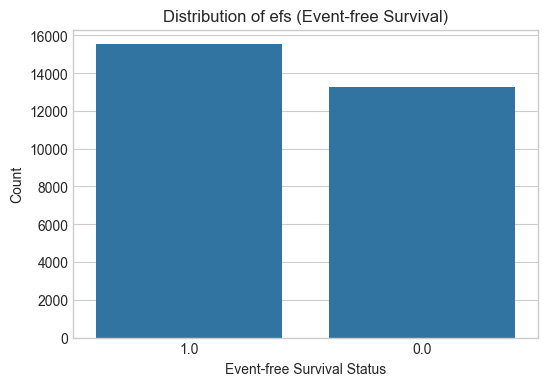

In [13]:
# Countplot for the categorical target "efs"
plt.figure(figsize=(6,4))
sns.countplot(x='efs', data=train, order=train['efs'].value_counts().index)
plt.title('Distribution of efs (Event-free Survival)')
plt.xlabel('Event-free Survival Status')
plt.ylabel('Count')
plt.show()

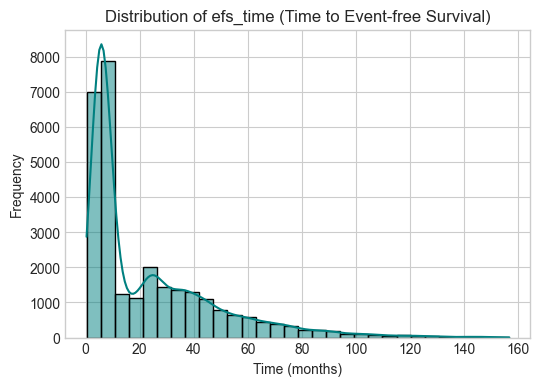

In [14]:
# Histogram (with kernel density estimate) for efs_time
plt.figure(figsize=(6,4))
sns.histplot(train['efs_time'], kde=True, bins=30, color='teal')
plt.title('Distribution of efs_time (Time to Event-free Survival)')
plt.xlabel('Time (months)')
plt.ylabel('Frequency')
plt.show()

1. Distribution of efs
   - The dataset has a binary target where 0.0 typically denotes an event, and 1.0 denotes censoring or event-free status. The bar plot indicates a relatively balanced split, with a slight predominance of “no event” (1.0).

2. Distribution of efs_time
   - The histogram is right-skewed, showing many events in the earlier months and a long tail of patients who remain event-free for extended periods (up to ~156 months).

--------------------------------------------------------------------------------
3. Numeric Feature Analysis
--------------------------------------------------------------------------------

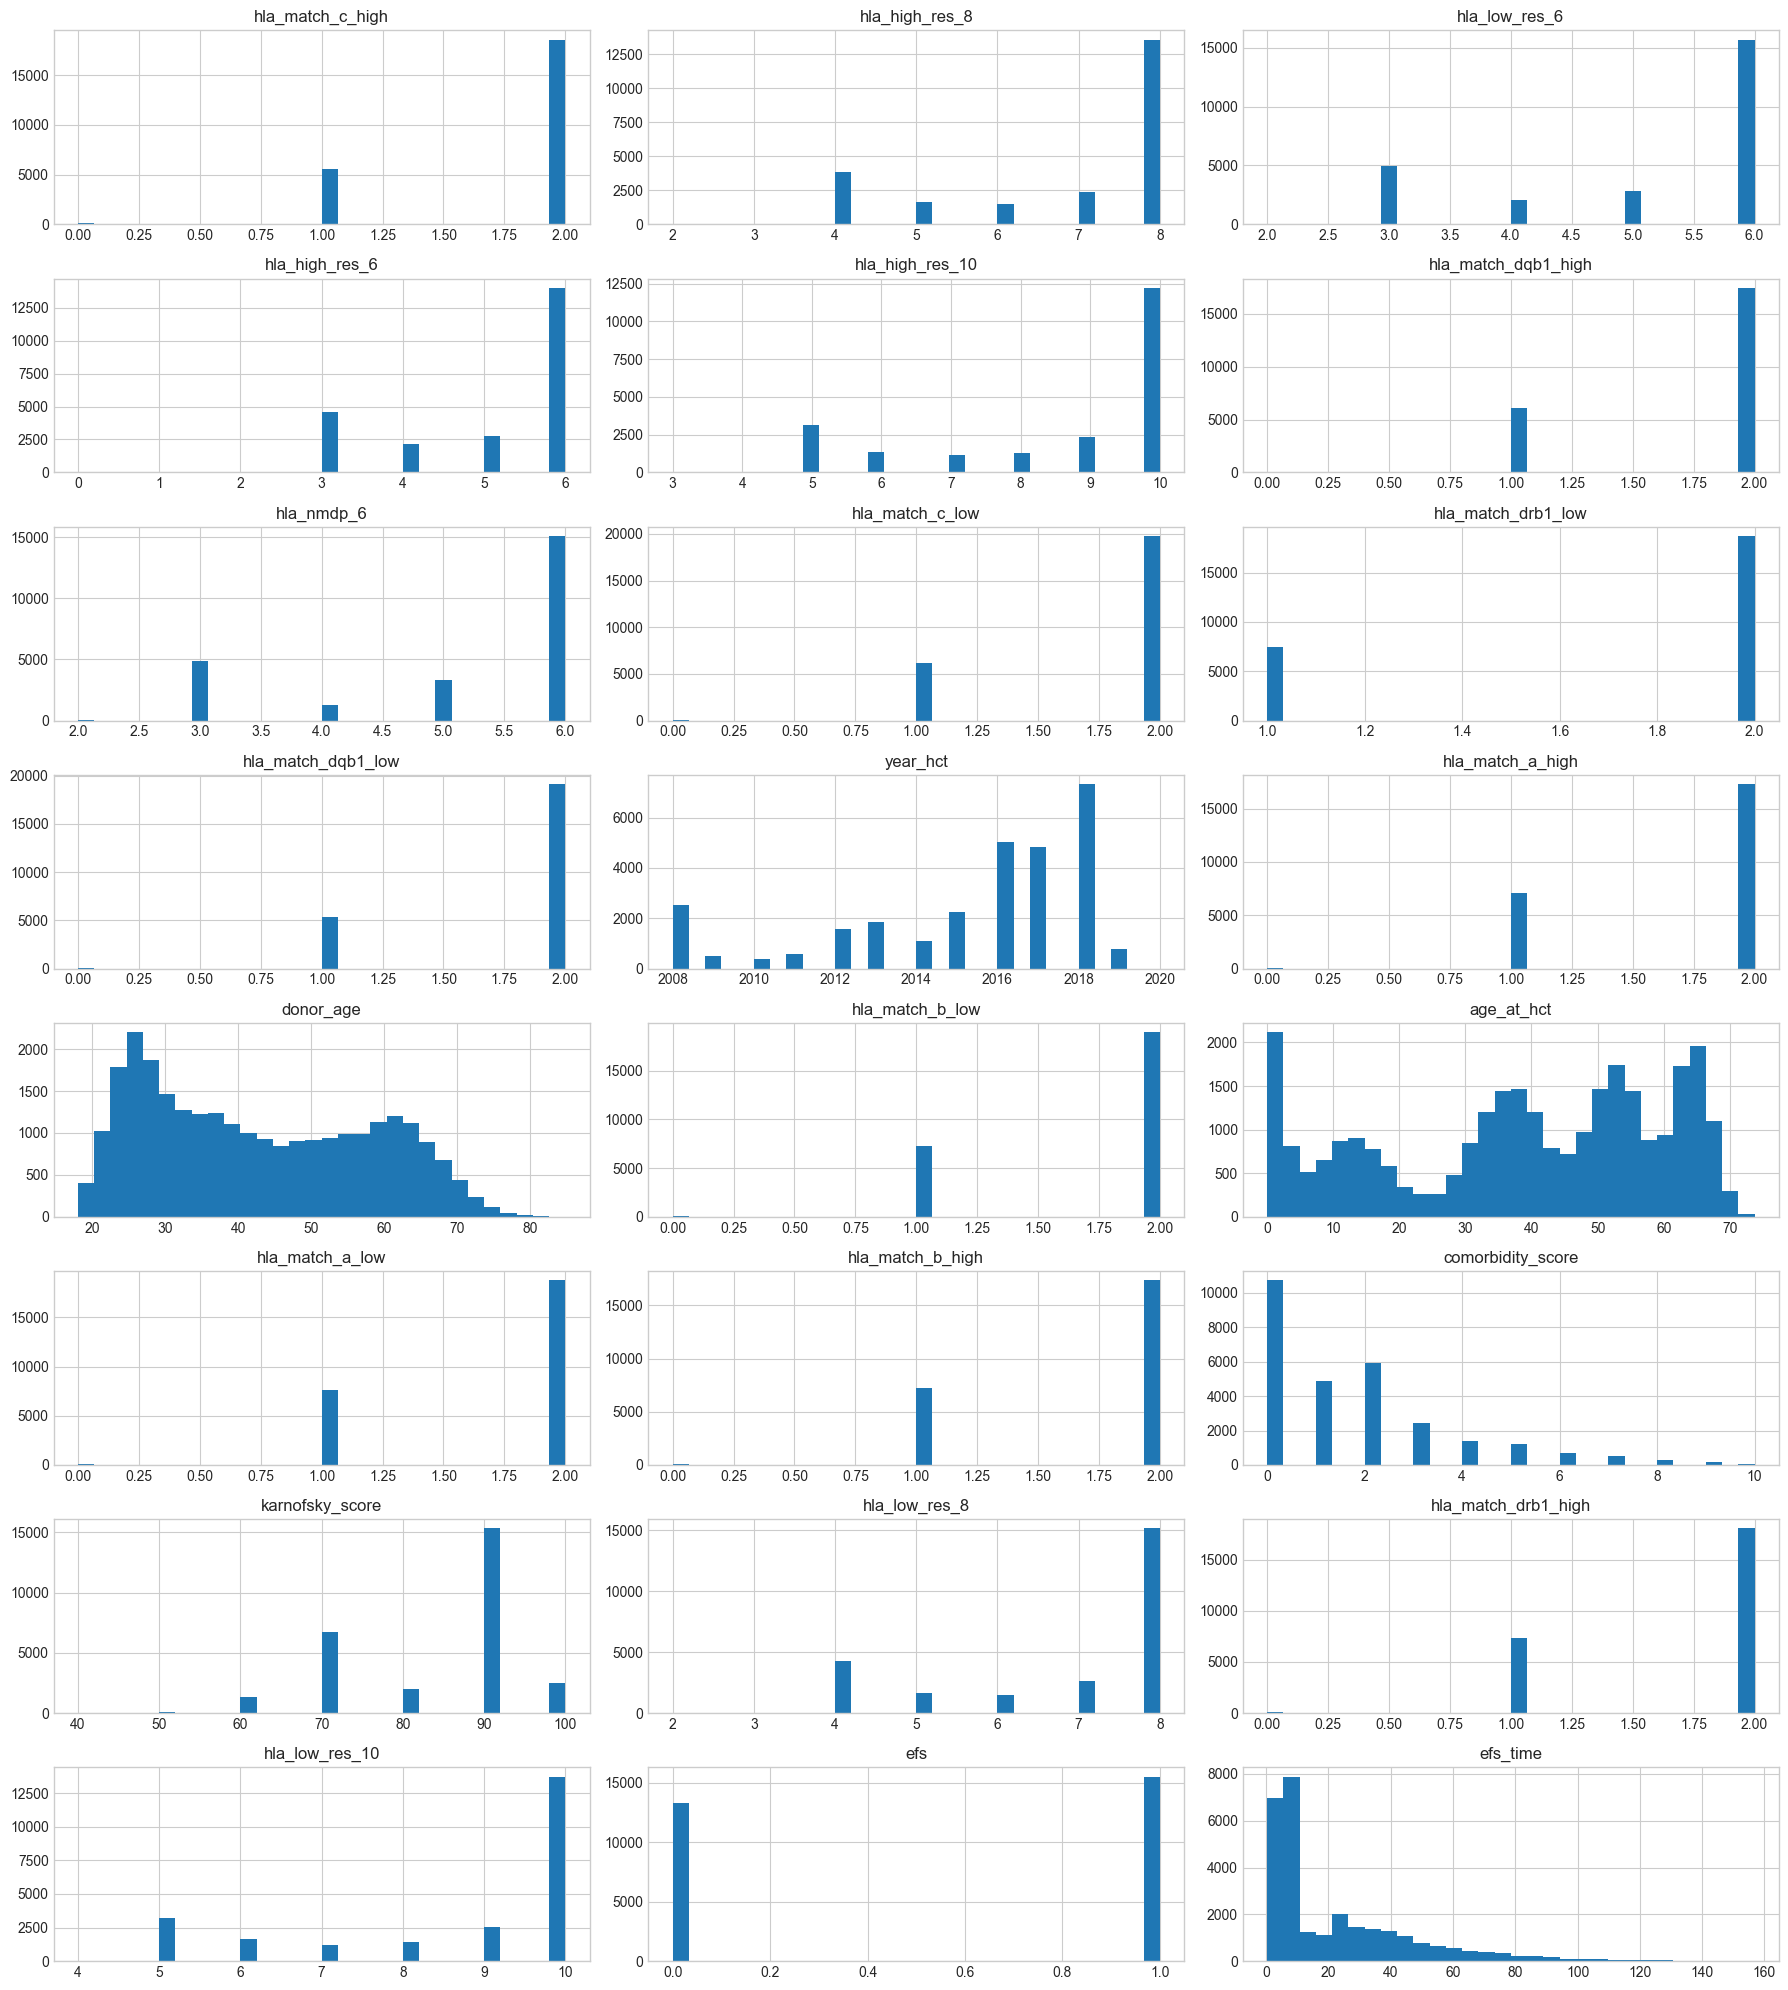

In [15]:
# Get list of numeric columns (excluding identifier if present)
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
if 'ID' in num_cols:
    num_cols.remove('ID')

# Plot histograms for all numeric features
train[num_cols].hist(bins=30, figsize=(18, 20), layout=(int(np.ceil(len(num_cols)/3)), 3))
plt.tight_layout()
plt.show()

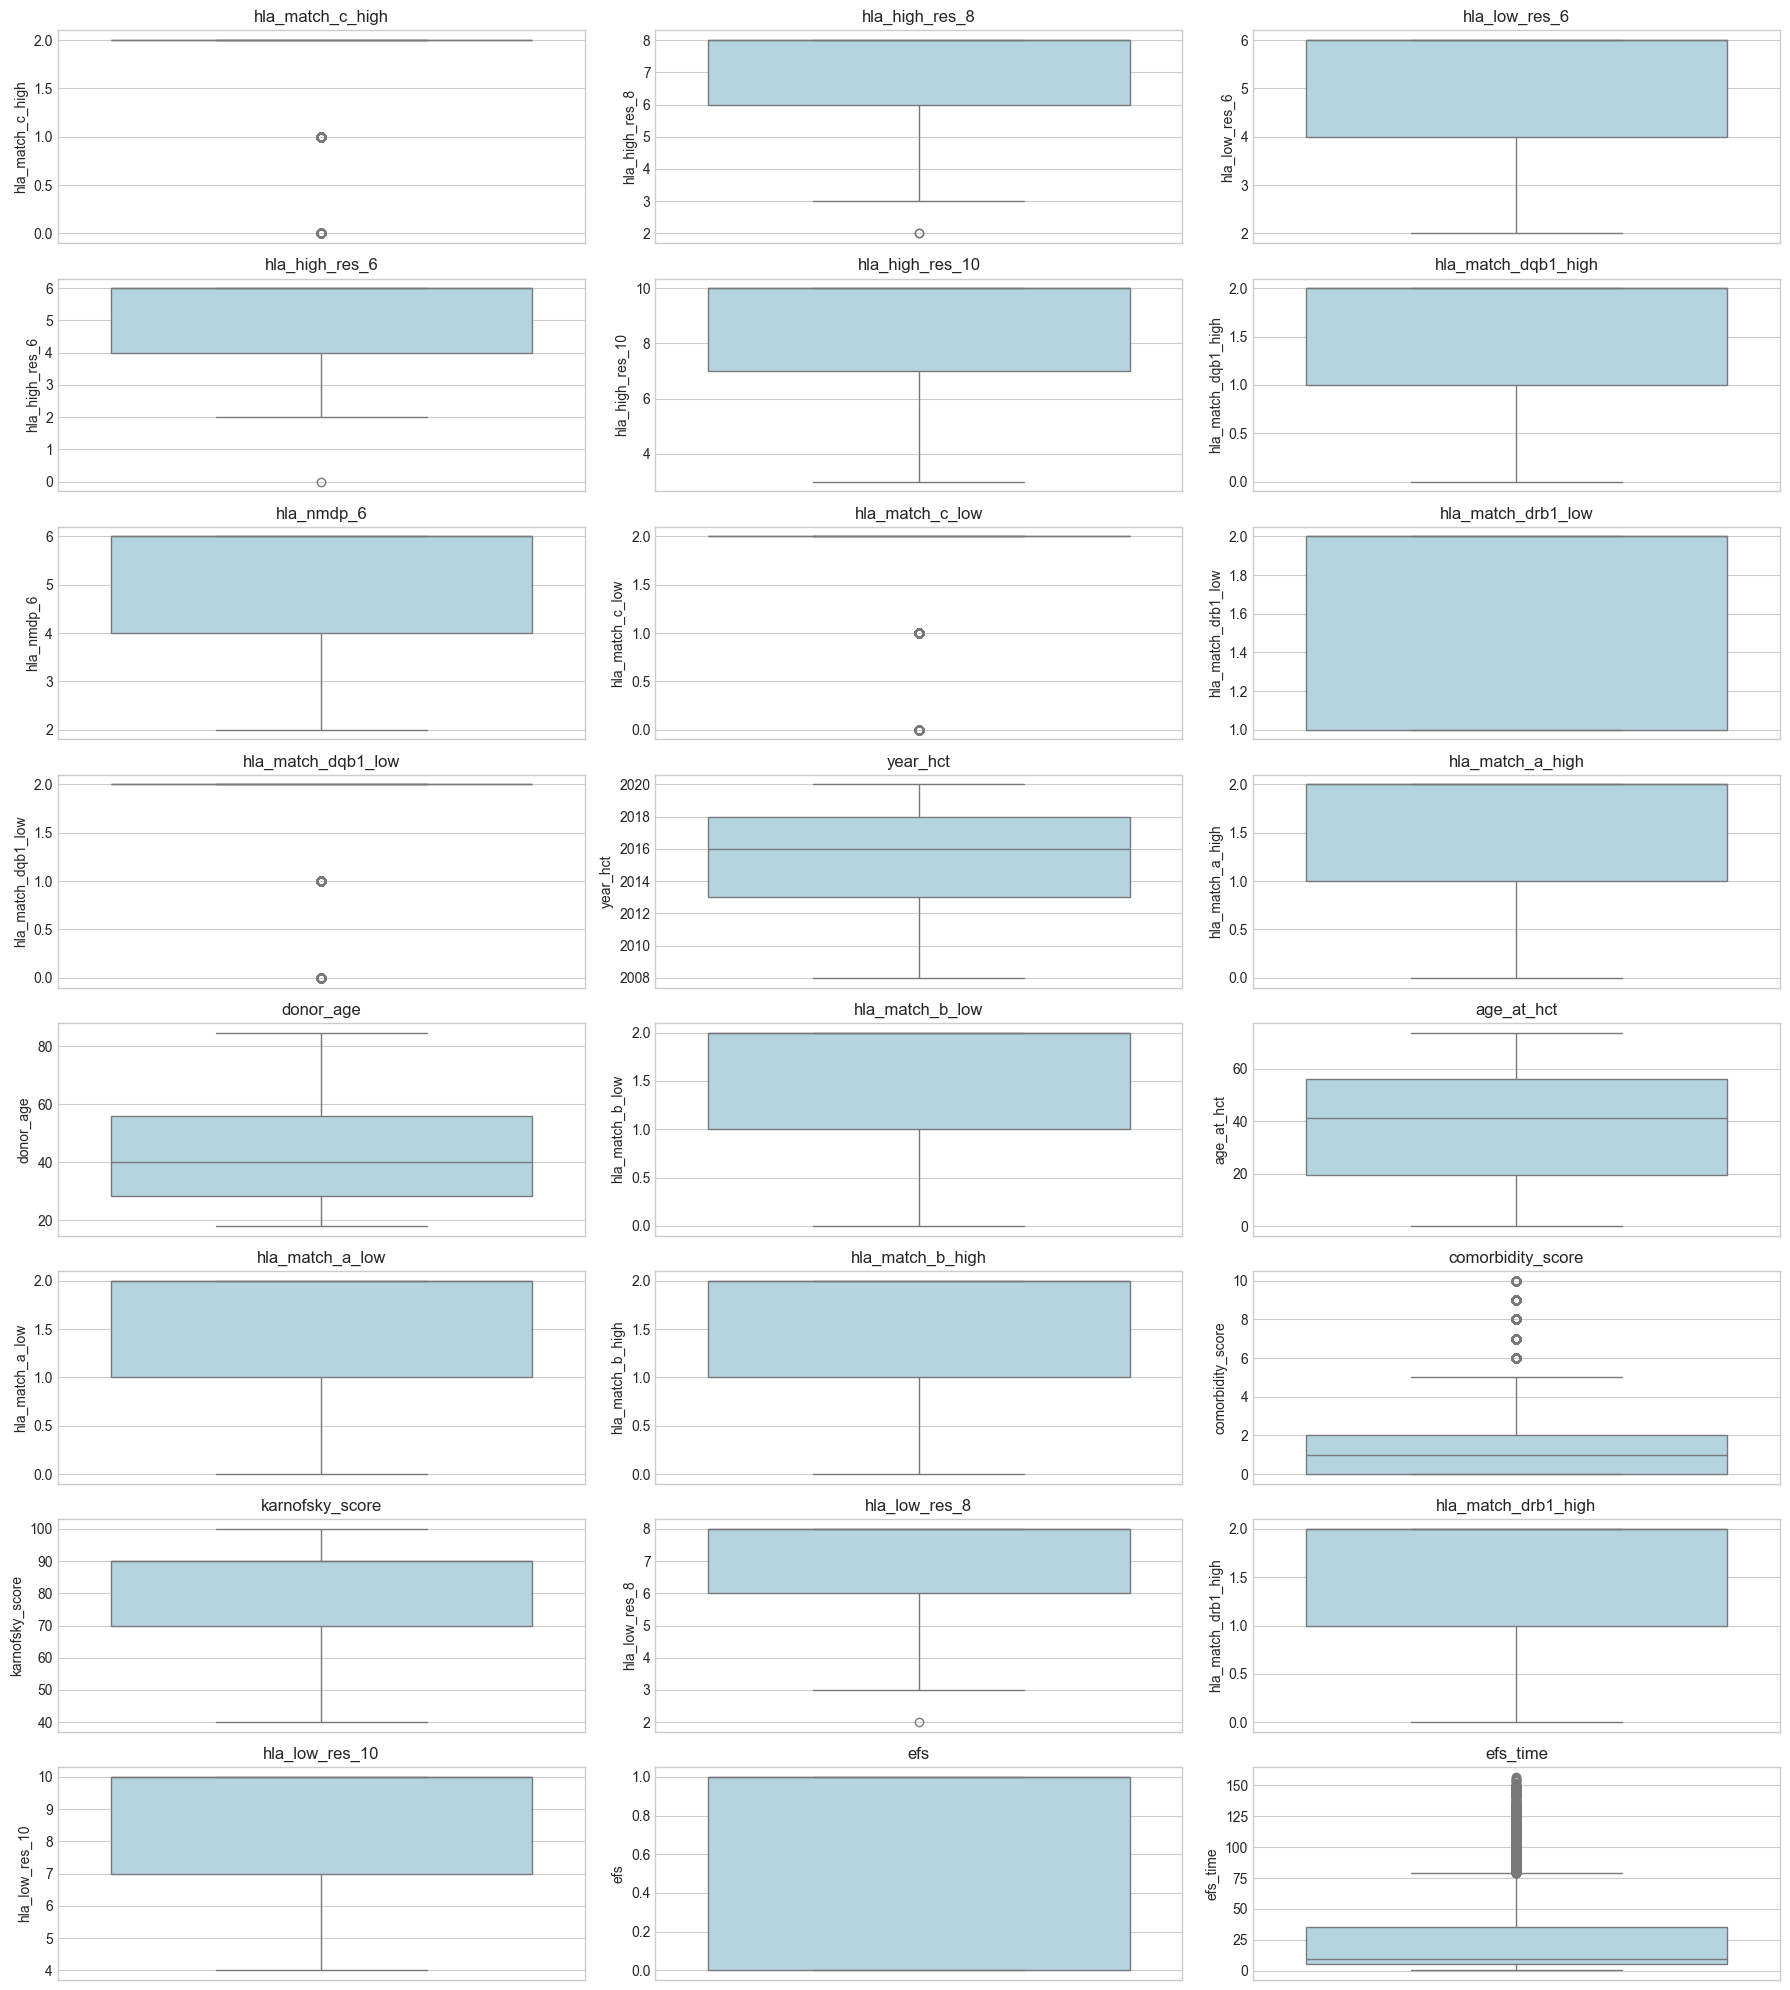

In [16]:
# Boxplots can help detect outliers for each numeric feature.
plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols):
    plt.subplot(int(np.ceil(len(num_cols)/3)), 3, i+1)
    sns.boxplot(y=train[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()
plt.show()

1. Histograms
   - age_at_hct and donor_age both show a broad range, with peaks around young adulthood through middle age.
   - HLA-Matching Variables (e.g., hla_match_a_high, hla_match_b_low) are generally integer-like (0, 1, 2) with a notable fraction of missing or zero entries.
   - comorbidity_score is heavily skewed toward lower values (0–2), indicating many patients have few comorbidities.

2. Boxplots
   - Several columns exhibit outliers (e.g., efs_time with very long survival durations).
   - donor_age and age_at_hct have fewer extreme outliers but show wide variability.

--------------------------------------------------------------------------------
4. Categorical Feature Distributions
--------------------------------------------------------------------------------

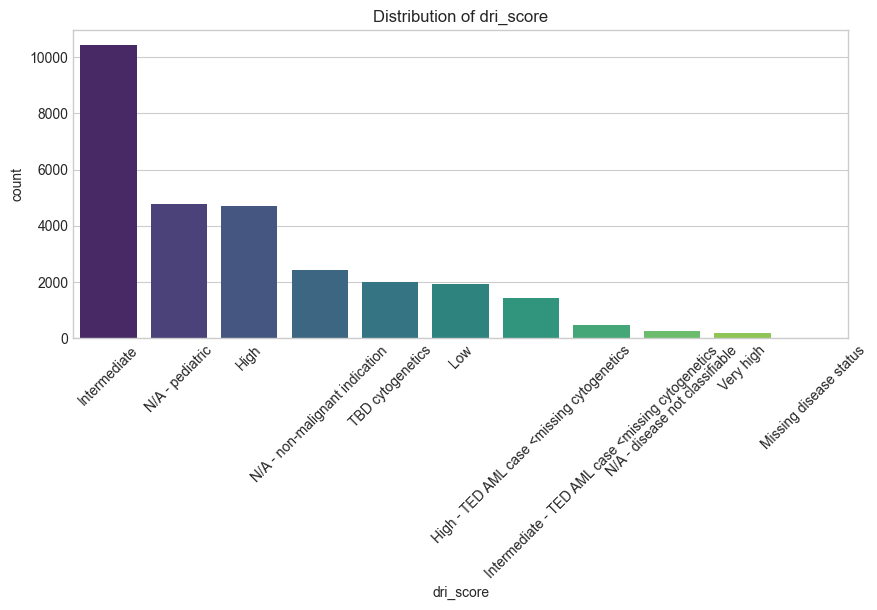

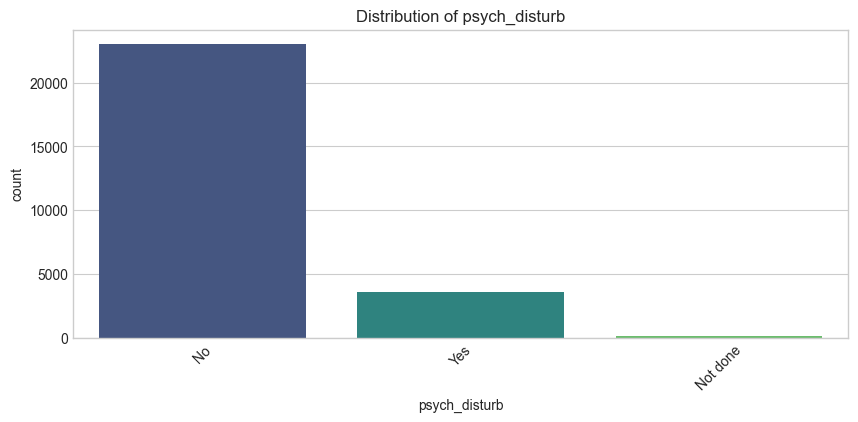

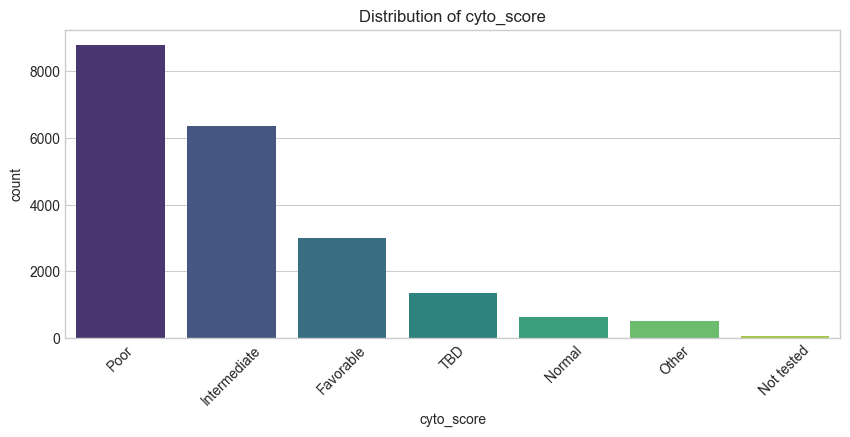

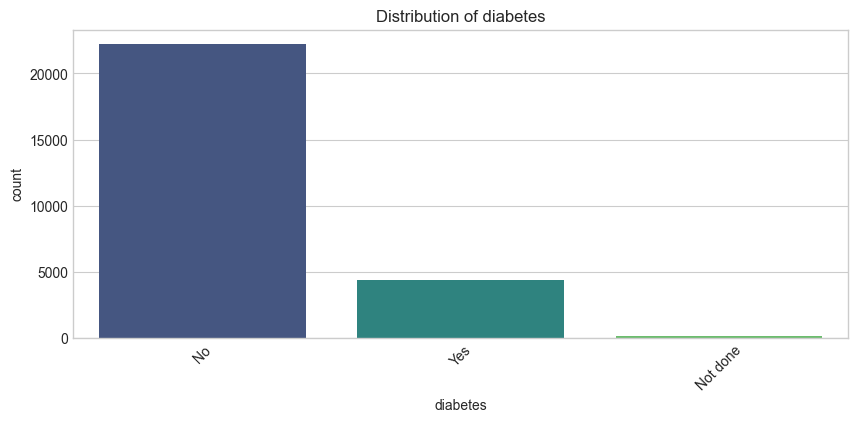

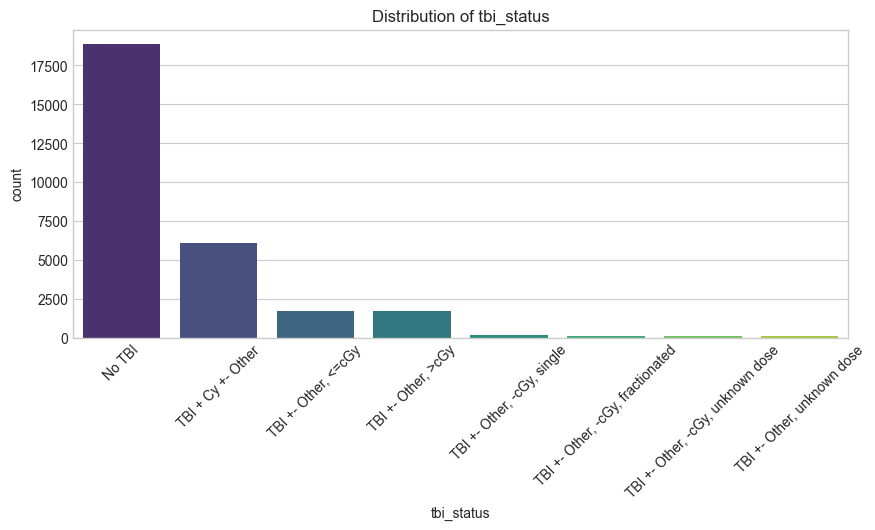

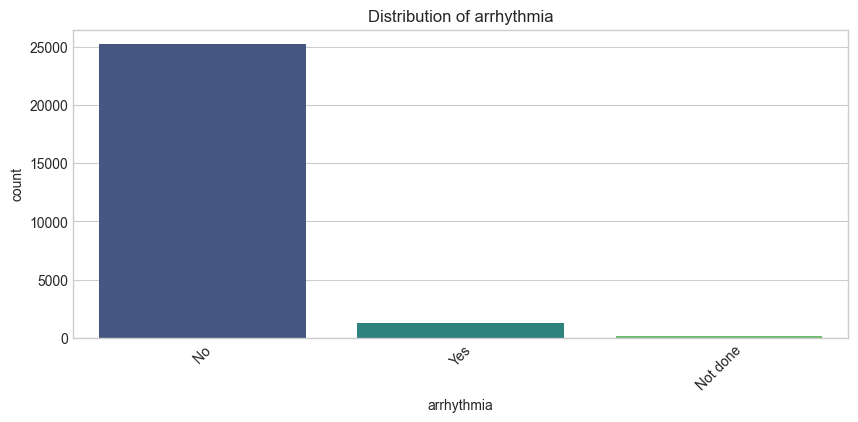

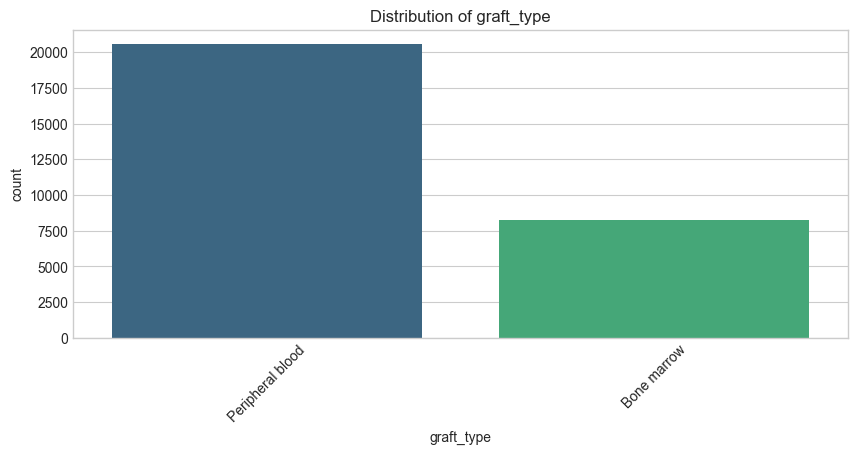

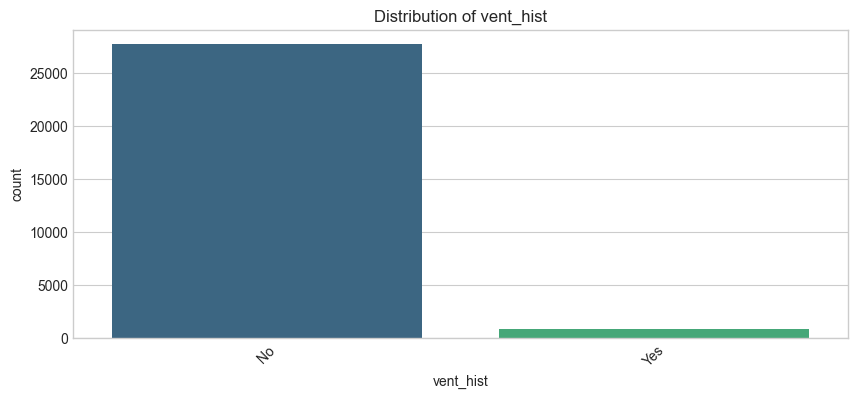

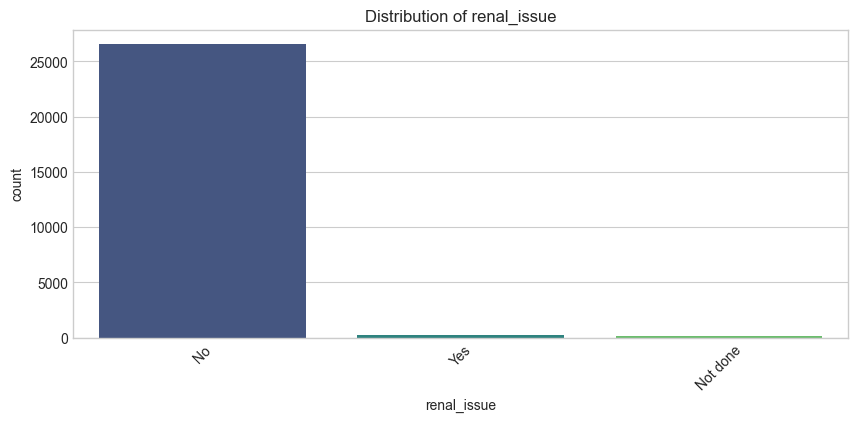

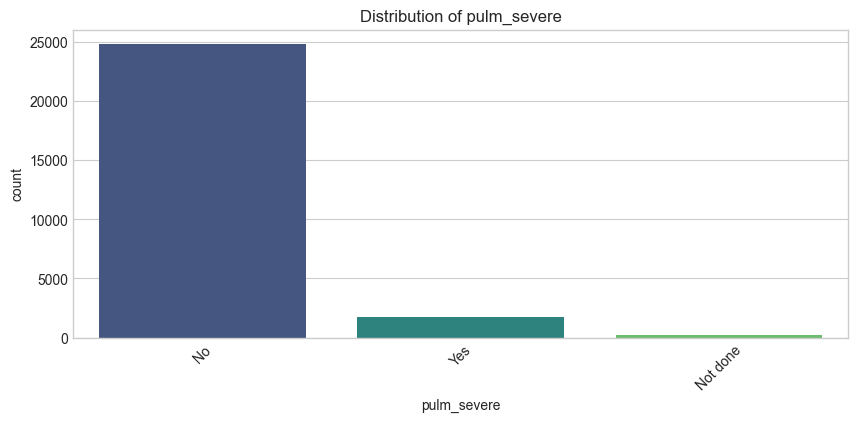

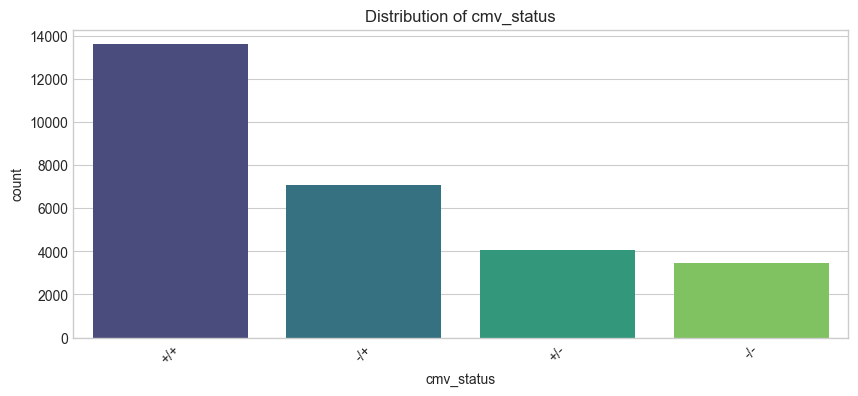

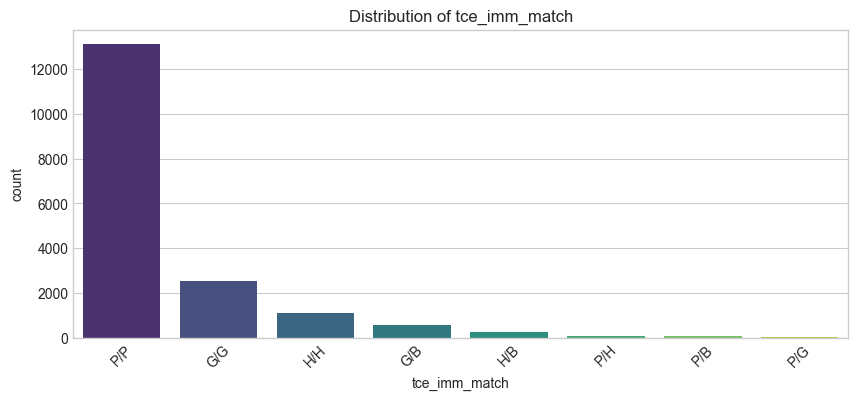

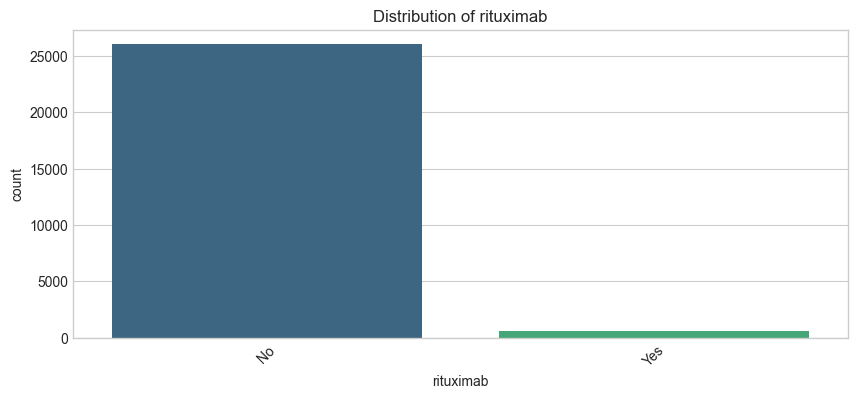

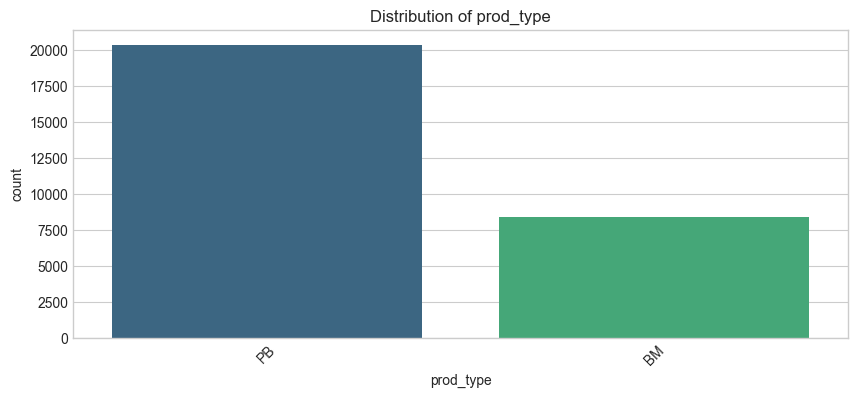

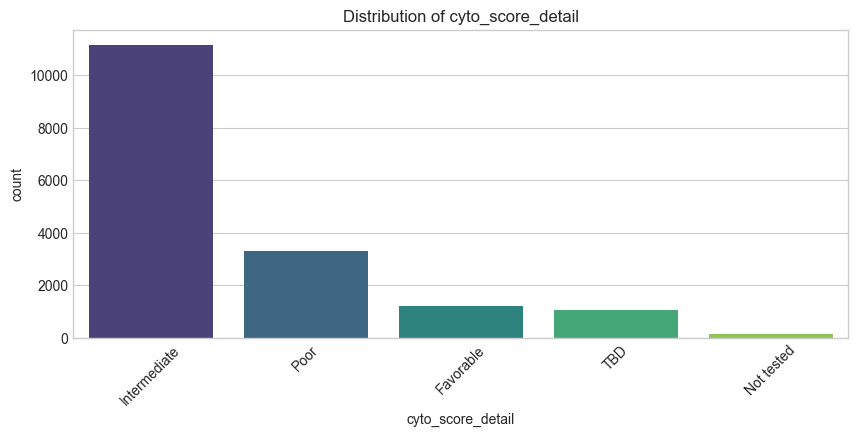

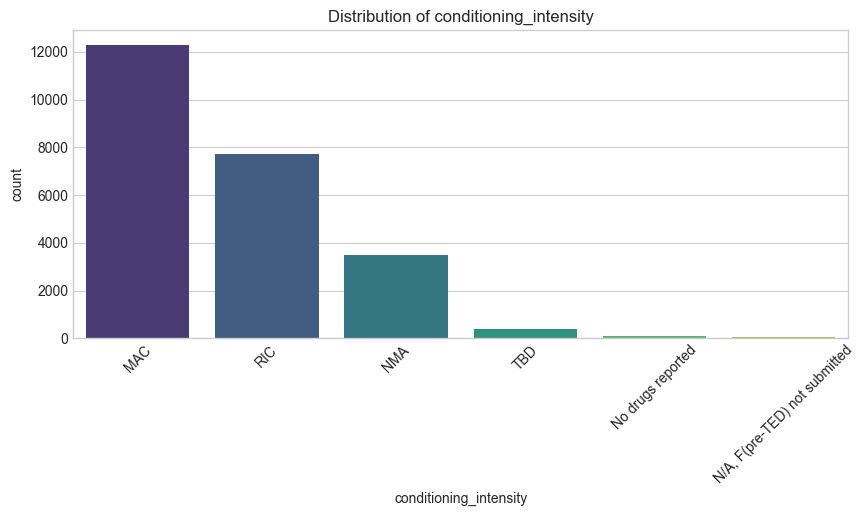

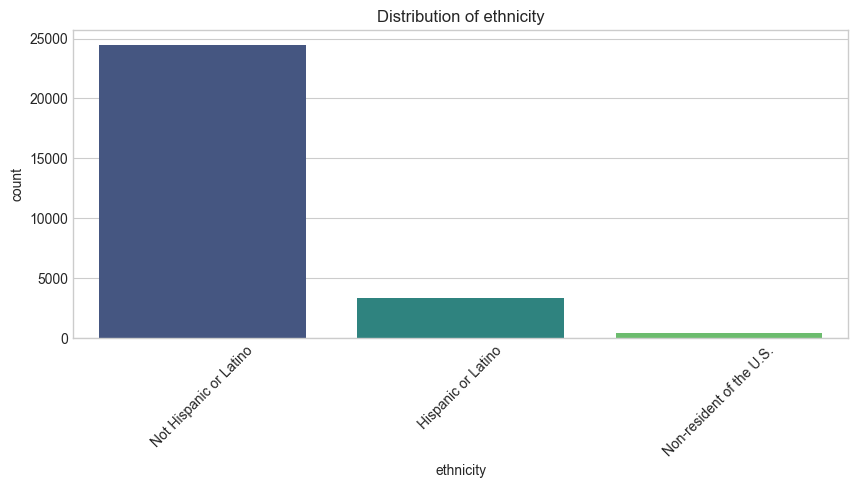

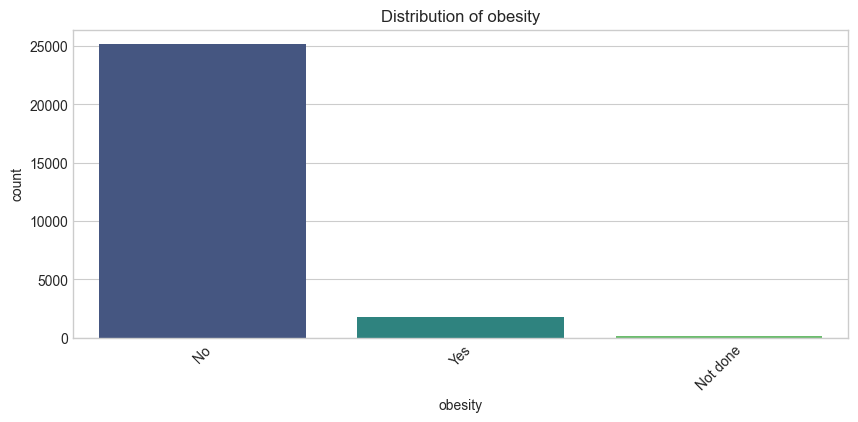

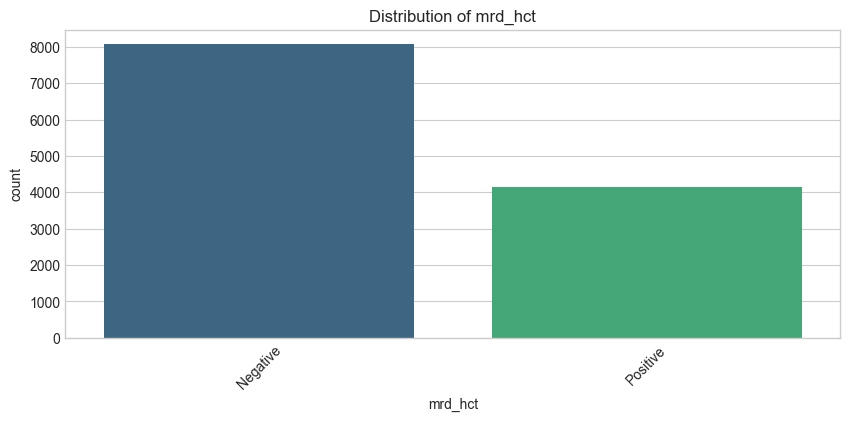

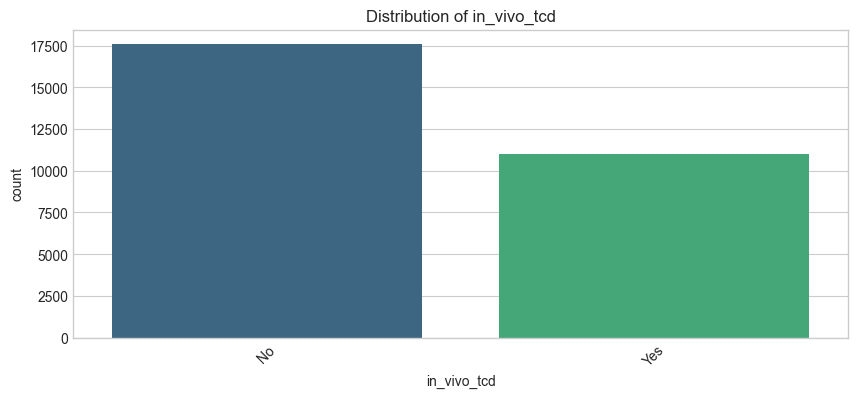

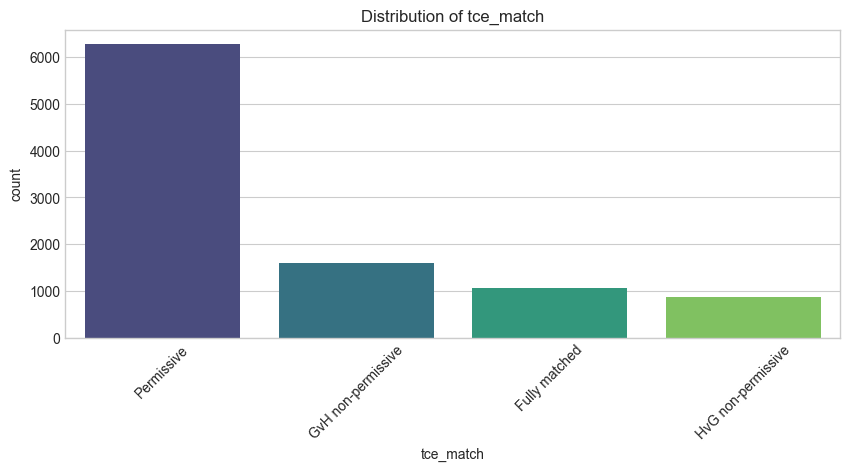

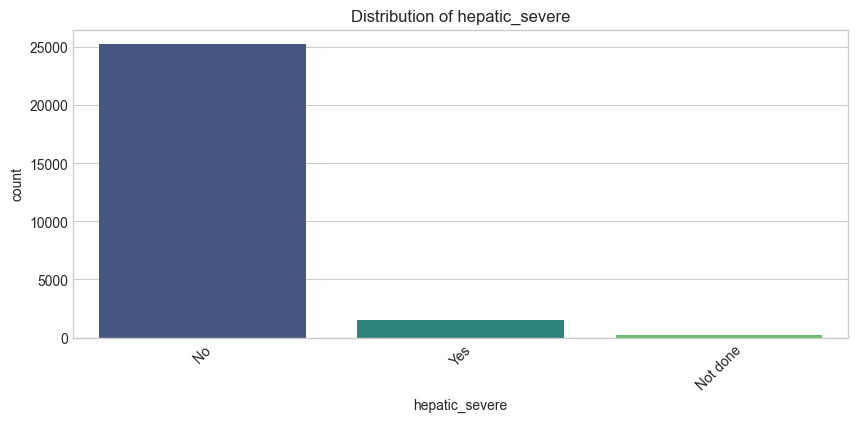

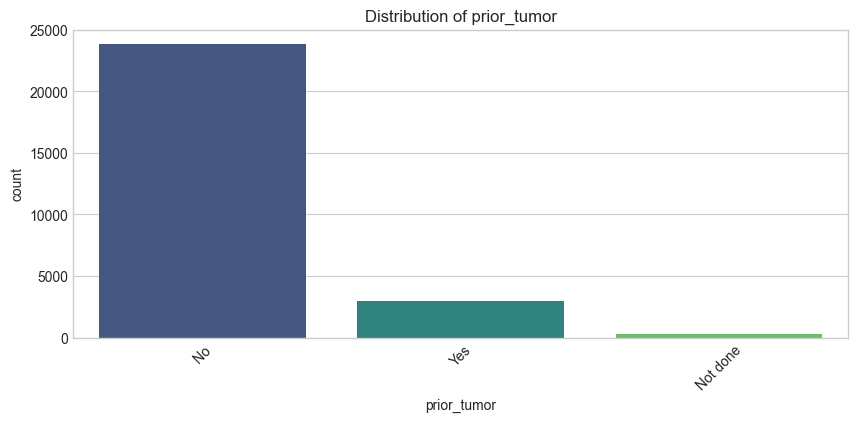

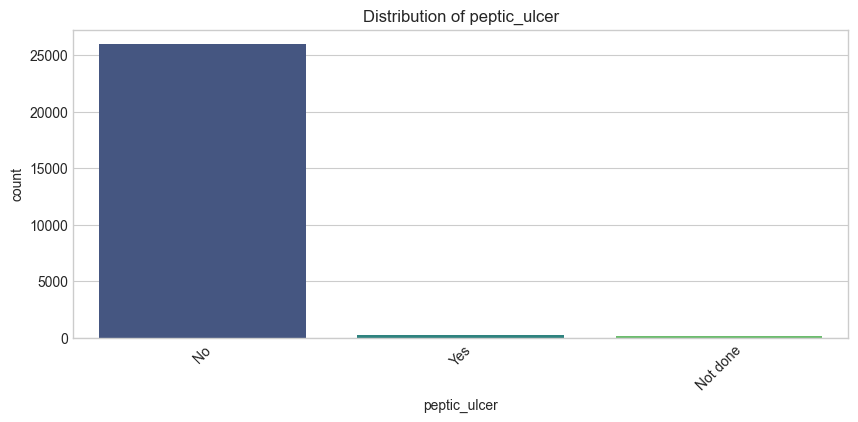

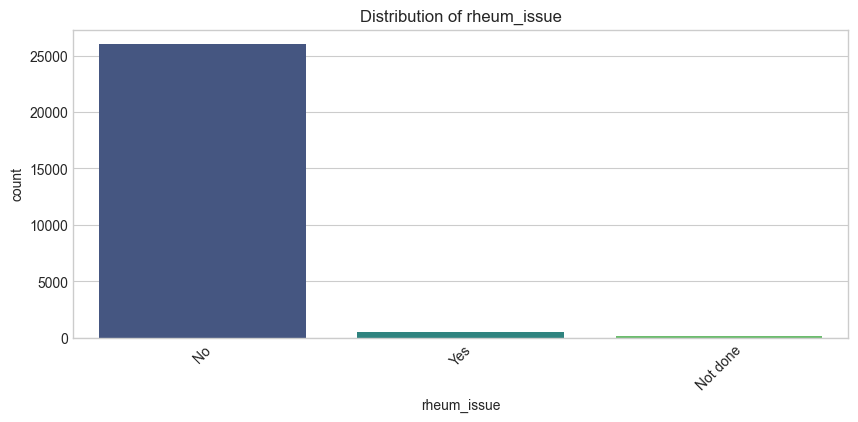

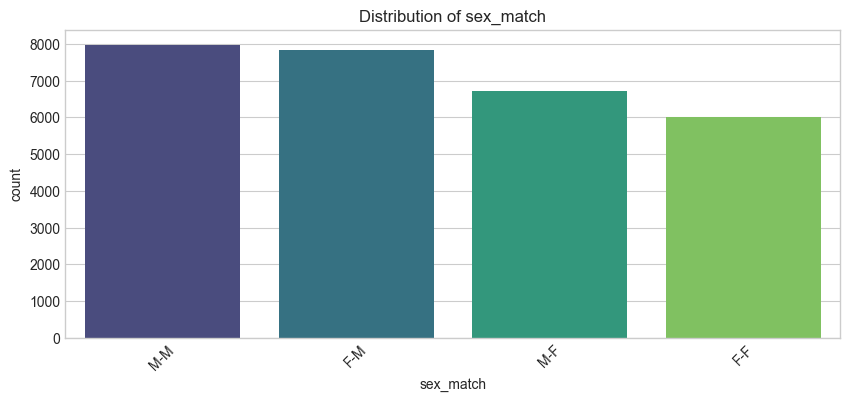

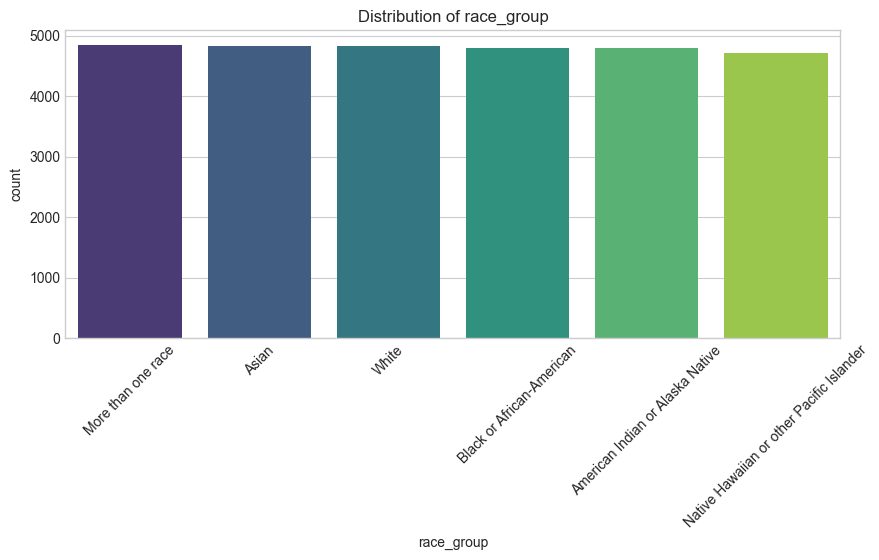

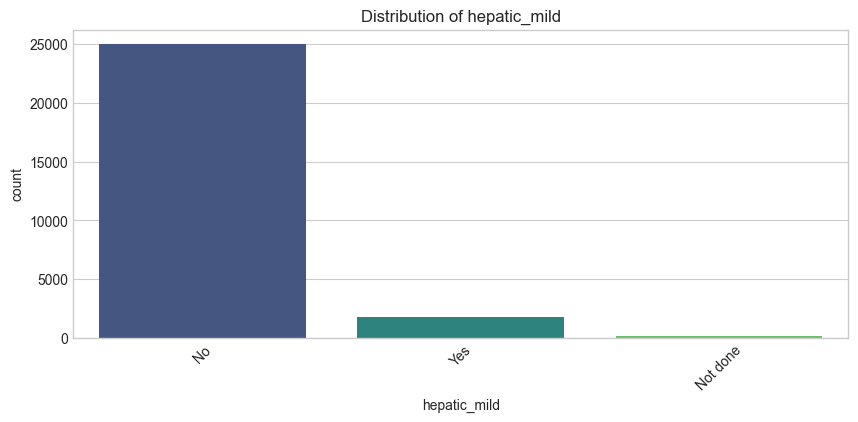

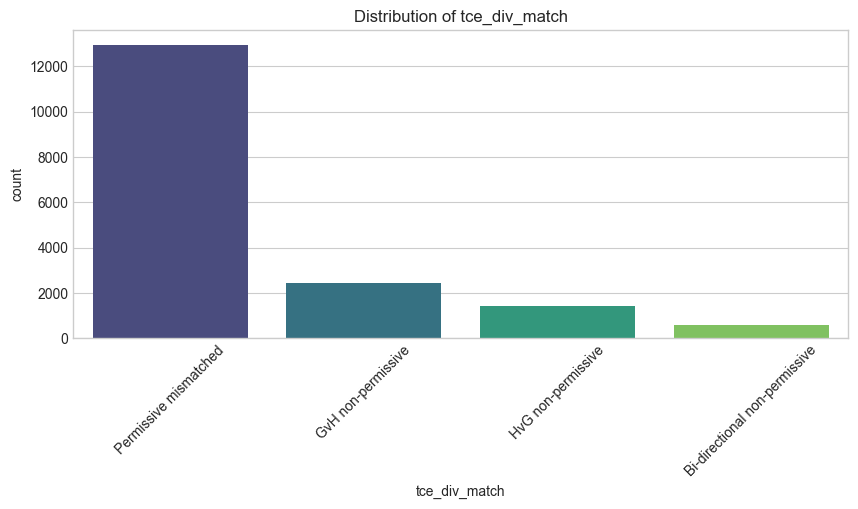

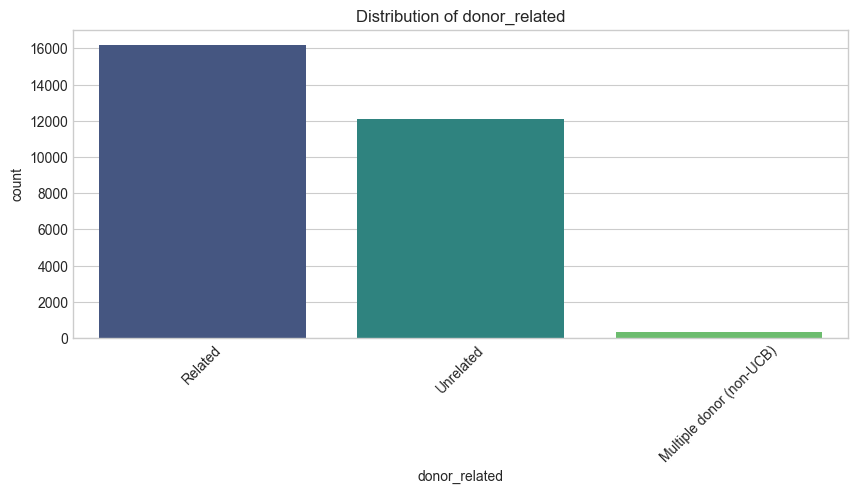

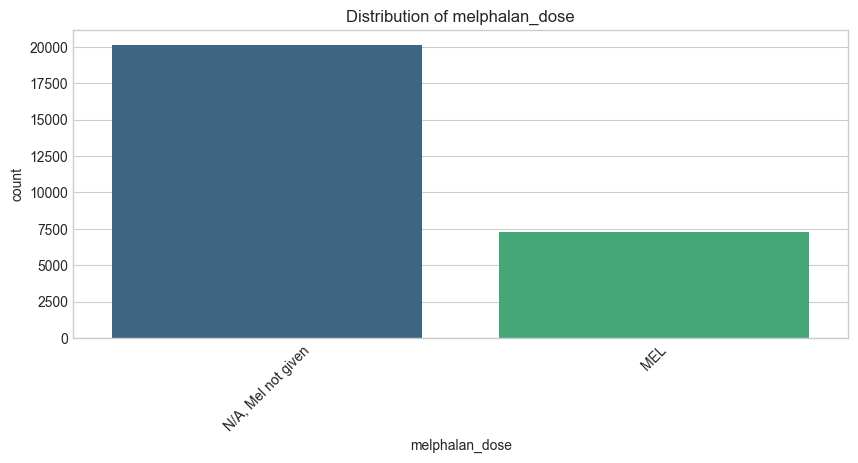

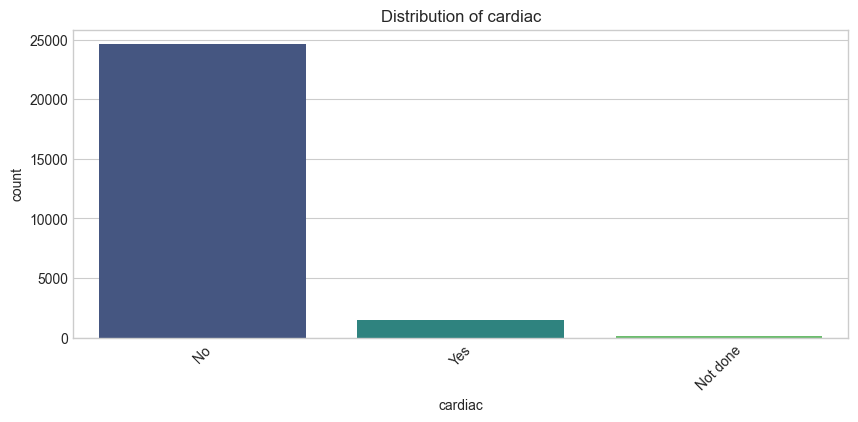

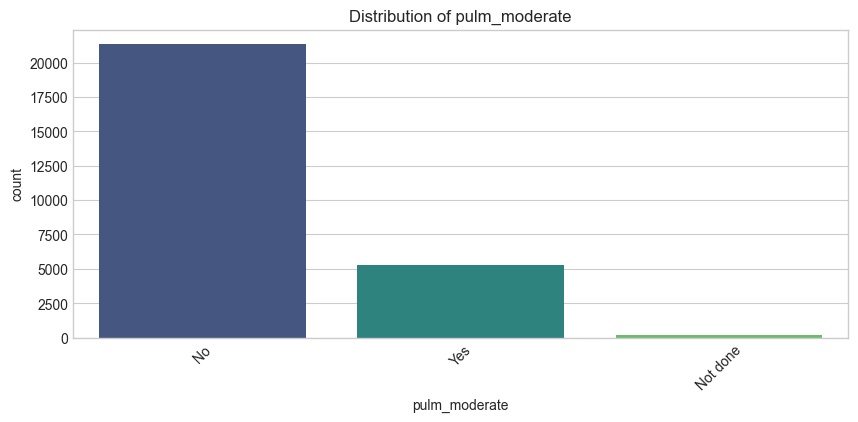

In [17]:
# Optionally filter for columns with fewer than, say, 15 unique values for visualization.
filtered_cat = [col for col in cat_cols if train[col].nunique() <= 15]

for col in filtered_cat:
    plt.figure(figsize=(10, 4))
    order = train[col].value_counts().index
    sns.countplot(x=col, data=train, order=order, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Many categorical features (over 30) were plotted. A recurring theme is a strong skew toward one or two dominant categories in each variable:

1. Transplant-Related Variables
   - tbi_status: “No TBI” overwhelmingly dominates, with the remainder split among TBI + Cyclophosphamide (Cy) or other regimens.
   - conditioning_intensity: Mostly “MAC” (Myeloablative Conditioning) and “RIC” (Reduced-Intensity Conditioning).
   - prod_type / graft_type: Peripheral blood (PB) is the most common graft source, followed by bone marrow (BM).

2. Clinical Comorbidities & Health Status
   - arrhythmia, renal_issue, pulm_severe, hepatic_severe, hepatic_mild, cardiac, prior_tumor, peptic_ulcer, rheum_issue, obesity: Each shows a large “No” category, indicating relatively few patients are reported to have these conditions.
   - pulm_moderate: Similarly skewed toward “No,” with a smaller group of “Yes” cases.

3. Donor/Recipient Matching & Prophylaxis
   - cmv_status: The largest group is “+/+” (both donor and recipient CMV-positive), though other combinations are also significant.
   - tce_imm_match / tce_div_match: “P/P” and “Permissive mismatched” are most common, while non-permissive mismatches appear less frequently.
   - in_vivo_tcd: “No” T-cell depletion is more frequent than “Yes,” reflecting common transplant practices.

4. Disease & Risk Classifications
   - dri_score, cyto_score, cyto_score_detail: Distributions indicate a large subset of “Intermediate” or “Poor” risk categories, relevant for modeling EFS.
   - mrd_hct (for AML/ALL patients): Mostly “Negative,” though a substantial portion is “Positive.”

5. Demographics
   - race_group: The dataset is designed to have relatively balanced representation (White, Black/African-American, Asian, American Indian/Alaska Native, Native Hawaiian/Pacific Islander, More than one race). Counts are broadly similar across groups, though “More than one race” stands out slightly.
   - ethnicity: “Not Hispanic or Latino” dominates, with smaller but significant “Hispanic or Latino” and “Non-resident of the U.S.” categories.
   - sex_match: The largest categories are M-M and F-M, followed by M-F and F-F.

6. Other Variables
   - melphalan_dose: Over half of the records have “N/A, Mel not given,” and the rest are primarily “MEL,” implying a binary-like distribution for Melphalan use.
   - donor_related: More “Related” than “Unrelated” donors, though a noteworthy subset is “Multiple donor (non-UCB).”

--------------------------------------------------------------------------------
5. Conclusion
--------------------------------------------------------------------------------

This comprehensive EDA reveals a dataset characterized by:
- Substantial Missingness in specific columns, requiring careful imputation or alternative handling.
- Highly Skewed Categorical Distributions, with many “No” or “Not done” categories dominating.
- Balanced Race Representation, supporting the fairness aspect of modeling.
- Skewed Time-to-Event Data, typical of survival outcomes, calling for specialized survival analysis methods.

Overall, the dataset offers rich clinical and demographic detail but demands strategic preprocessing and modeling approaches. Future steps might include:
- Imputation Strategies: Employing advanced methods (e.g., multiple imputation or domain-specific imputations) for columns with high missingness.
- Feature Engineering: Aggregating or binning rare categories, and exploring interactions (e.g., combining TBI status with conditioning intensity).
- Survival Modeling: Considering appropriate survival methods (e.g., Cox PH models, random survival forests) that can handle censoring and time-dependent risk.
- Fairness and Bias Mitigation: Monitoring performance across race/ethnicity groups to ensure equitable predictive accuracy.

These findings form a solid foundation for subsequent model development, hyperparameter tuning, and rigorous fairness evaluations—ultimately advancing equitable survival predictions for patients undergoing HCT.
